<img src="./img/logo.png" align="right" width="50%"></img>
# iAtlantic GeoNode Workshop
### Tier 2: How to use OGC webservices offered by the iAtlantic GeoNode in your data analysis

## 2. Visualize data using OGC Web Mapping Service (WMS)

The OWSLib library is a python library that makes accessing data and metadata through OGC services possible. The library abstracts all of the traditional HTTP API calls into programmatic function calls. We will be using this library throughout the tutorial to interact with the iAtlantic GeoNode OGC services.

The library is available from GitHub @  https://github.com/geopython/OWSLib

In [48]:
from owslib.wms import WebMapService

#### Create a WebMapService object

In [49]:
wms = WebMapService('https://www.geonode.iatlantic.eu/geoserver/ows', version='1.3.0')

#### Find out what a WMS has to offer. Service metadata:

In [50]:
print(wms.identification.type)
print(wms.identification.version)
print(wms.identification.title)
print(wms.identification.abstract)

WMS
1.3.0
iAtlantic WMS
This WMS service offers visualization of data collected within the framework of the iAtlantic project.


#### Find out what layers are available

In [51]:
list(wms.contents)

['geonode:Alcyoniina_Habitat_Suitability',
 'geonode:Antipatharia_Habitat_Suitability',
 'geonode:AquaMaps_Species_Richness',
 'geonode:AquaMaps_Species_Richness_Cetaceans',
 'geonode:AquaMaps_Species_Richness_Elasmobranchs0',
 'geonode:Basins',
 'geonode:Bathymetry_of_Espirito_Santo_and_Campos_basins_SW_Atlantic1',
 'geonode:Bottom_EMU_Cluster0',
 'geonode:Bridges',
 'geonode:CCAMLR',
 'geonode:CE19008_MoCha_SCan_60m_UTM28',
 'geonode:Calcaxonia_Habitat_Suitability',
 'geonode:DCDB_200320_BathyCoverage_iAtlantic',
 'geonode:Enallopsammia_rostrata_Habitat_Suitability',
 'geonode:Escarpments',
 'geonode:Fans',
 'geonode:Fracture_Zone',
 'geonode:GFW_FishingHours_fixed_gear_2020',
 'geonode:GFW_FishingHours_longline_2020',
 'geonode:GFW_FishingHours_trawlers_2020',
 'geonode:Geographic_Area_of_Competence_of_Internationa',
 'geonode:Geographic_Area_of_Competence_of_Internationa0',
 'geonode:Geographic_Area_of_Competence_of_Internationa1',
 'geonode:Glacial_troughs',
 'geonode:Global_EBSAs

#### Get the details of a layer. Layer metadata:

In [52]:
print(wms['geonode:Alcyoniina_Habitat_Suitability'].title)
print(wms['geonode:Alcyoniina_Habitat_Suitability'].abstract)

Alcyoniina Habitat Suitability
This dataset consists of global raster maps indicating the habitat suitability for 7 suborders of cold water octocorals (Octocorallia found deeper than 50m). Maps present a relative habitat suitability index ranging from 0 (unsuitable) to 100 (highly suitable). Two maps are provided for each suborder (Alcyoniina, Calcaxonia, Holaxonia, Scleraxonia, Sessiliflorae, Stolonifera, and Subselliflorae). A publicly accessable low resolution map (grid size 10x10 arc-minutes) and a restricted access high resolution map (grid size 30x30 arc-seconds). Maps are geotiff format incorporating LZW compression to reduce file size. 
Please contact the corresponding author (Chris Yesson) for access to the high resolution data.


#### Get bounding box information in WGS84

In [53]:
wms['geonode:Alcyoniina_Habitat_Suitability'].boundingBoxWGS84

(-179.99999999999966,
 -71.99999999999999,
 180.00000000000017,
 69.99999999999996)

#### Get available styles

In [54]:
wms['geonode:Alcyoniina_Habitat_Suitability'].styles

{'geonode:Alcyoniina_Habitat_Suitability': {'title': 'geonode:Alcyoniina_Habitat_Suitability',
  'legend': 'https://www.geonode.iatlantic.eu/geoserver/ows?service=WMS&request=GetLegendGraphic&format=image%2Fpng&width=20&height=20&layer=geonode%3AAlcyoniina_Habitat_Suitability',
  'legend_width': '43',
  'legend_height': '135',
  'legend_format': 'image/png'}}

#### See available methods

In [55]:
[op.name for op in wms.operations]

['GetCapabilities', 'GetMap', 'GetFeatureInfo']

#### Get available formats

In [56]:
wms.getOperationByName('GetMap').formatOptions

['image/png',
 'application/atom+xml',
 'application/json;type=utfgrid',
 'application/pdf',
 'application/rss+xml',
 'application/vnd.google-earth.kml+xml',
 'application/vnd.google-earth.kml+xml;mode=networklink',
 'application/vnd.google-earth.kmz',
 'image/geotiff',
 'image/geotiff8',
 'image/gif',
 'image/jpeg',
 'image/png; mode=8bit',
 'image/svg+xml',
 'image/tiff',
 'image/tiff8',
 'image/vnd.jpeg-png',
 'image/vnd.jpeg-png8',
 'text/html; subtype=openlayers',
 'text/html; subtype=openlayers2',
 'text/html; subtype=openlayers3']

#### Get a map image and plot with matplotlib

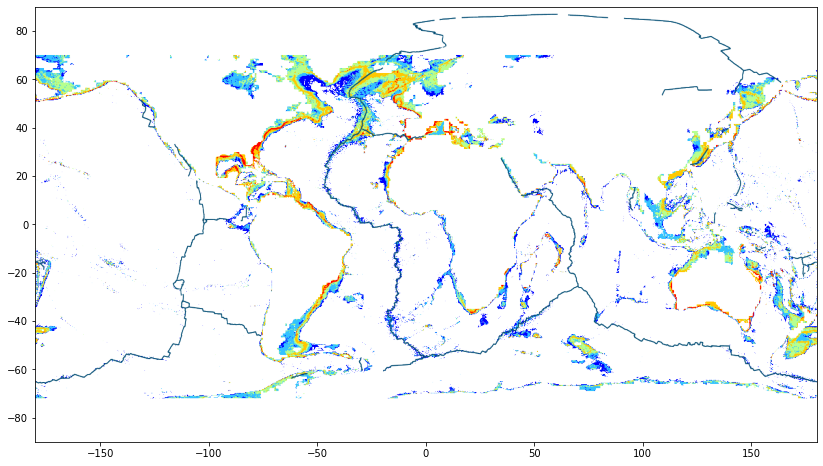

In [58]:
import os, sys
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def getMap(layerNames,bbox,filename):
    wms.getOperationByName('GetMap').formatOptions
    img = wms.getmap(layers=layerNames,
                 size=(1200,600),
                 srs='EPSG:4326',
                 bbox=bbox,
                 format='image/png',
                 transparent=True)

    tmpfile = open(filename,'wb')
    tmpfile.write(img.read())
    tmpfile.close()

# get animage combining the the Alcyoniina Habitat Suitability overlaid with the location of Oceanic Ridges
getMap(
    layerNames=['geonode:Alcyoniina_Habitat_Suitability','geonode:Oceanic_Ridge'],
    bbox=(-180,-90,180,90),
    filename='data/AlcyoniinaHabitatSuitability_and_OceanicRidges.png'
)

# read the image
image=mpimg.imread('data/AlcyoniinaHabitatSuitability_and_OceanicRidges.png')

# plot th image
plt.figure(figsize=(14, 8))
plt.imshow(image,extent=[-180,180,-90,90],aspect='auto')
plt.show()

#### Use the WMS service directly in Cartopy

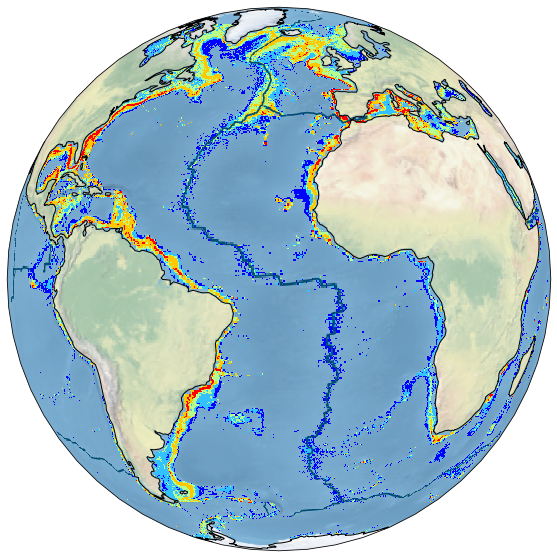

In [59]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=-25, central_latitude=0)) #set custom projection
ax.coastlines() #draw coastlines
ax.stock_img() #draw nice background
# access WMS requesting map images in custom projection
ax.add_wms(wms=wms.url,
           layers=['geonode:Alcyoniina_Habitat_Suitability','geonode:Oceanic_Ridge']) 
plt.show()

### [>> Next: Subset and download data using OGC Web Feature and Coverage Services (WFS/WCS)](./3_subset_and_download_data_with_WFS&WCS.ipynb)

<hr>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img style="float: right" alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>